##############################################
## POWER ANALYSIS

### evident tool

https://github.com/biocore/evident

setwd("~/Dropbox/WORK/PROJECTS/TB_MICROBIOME/Results_TB/Power_Analysis")

### Power analysis for PCA on metaphlan taxonomy
### Dataset for submitted version: psq3
#"dataset_for_submitted_ms/finall_phyloseq-TB-CONTROL-humann3.6-metacyc-pathways.RData"

### exported PCs: "power_analysis/taxonomy_PS_PCs_and_metadata.txt"


### Installation evident
WARNING: You are using pip version 21.1.1; however, version 23.3.2 is available.
You should consider upgrading via the '/mnt/d/Work/Evolutionary biomedicine/power_analysis/python3_envs/bin/python3 -m pip install --upgrade pip' command.

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

In [4]:
import evident
import pandas as pd
import os


In [5]:
pwd

'/mnt/d/Work/Evolutionary biomedicine/power_analysis'

In [6]:
os.chdir('/mnt/d/Work/Evolutionary biomedicine/power_analysis')


In [7]:
tax_PS_PCs = pd.read_table("./taxonomy_PS_PCs_and_metadata.txt", sep="\t", index_col=0)

In [11]:
tax_PS_PCs.groupby("Diagnosis").agg({'PC1' : ["count", "mean", "std"] })


tax_PS_PCs.groupby("Diagnosis").agg({'PC2' : ["count", "mean", "std"] })


pc1 = tax_PS_PCs["PC1"]
pc2 = tax_PS_PCs["PC2"]

tax_ps_p1 = evident.UnivariateDataHandler(pc1, tax_PS_PCs)
tax_ps_p2 = evident.UnivariateDataHandler(pc2, tax_PS_PCs)


In [12]:
# Now calculate the effect size of this difference

tax_ps_p1.calculate_effect_size(column="Diagnosis")

#TB EffectSizeResult(effect_size=1.8339990643442263, metric='cohens_d', column='Diagnosis')



EffectSizeResult(effect_size=0.3673804882873715, metric='cohens_d', column='Diagnosis')

In [13]:
tax_ps_p2.calculate_effect_size(column="Diagnosis")

EffectSizeResult(effect_size=0.0532416463898311, metric='cohens_d', column='Diagnosis')

<Figure size 350x350 with 0 Axes>

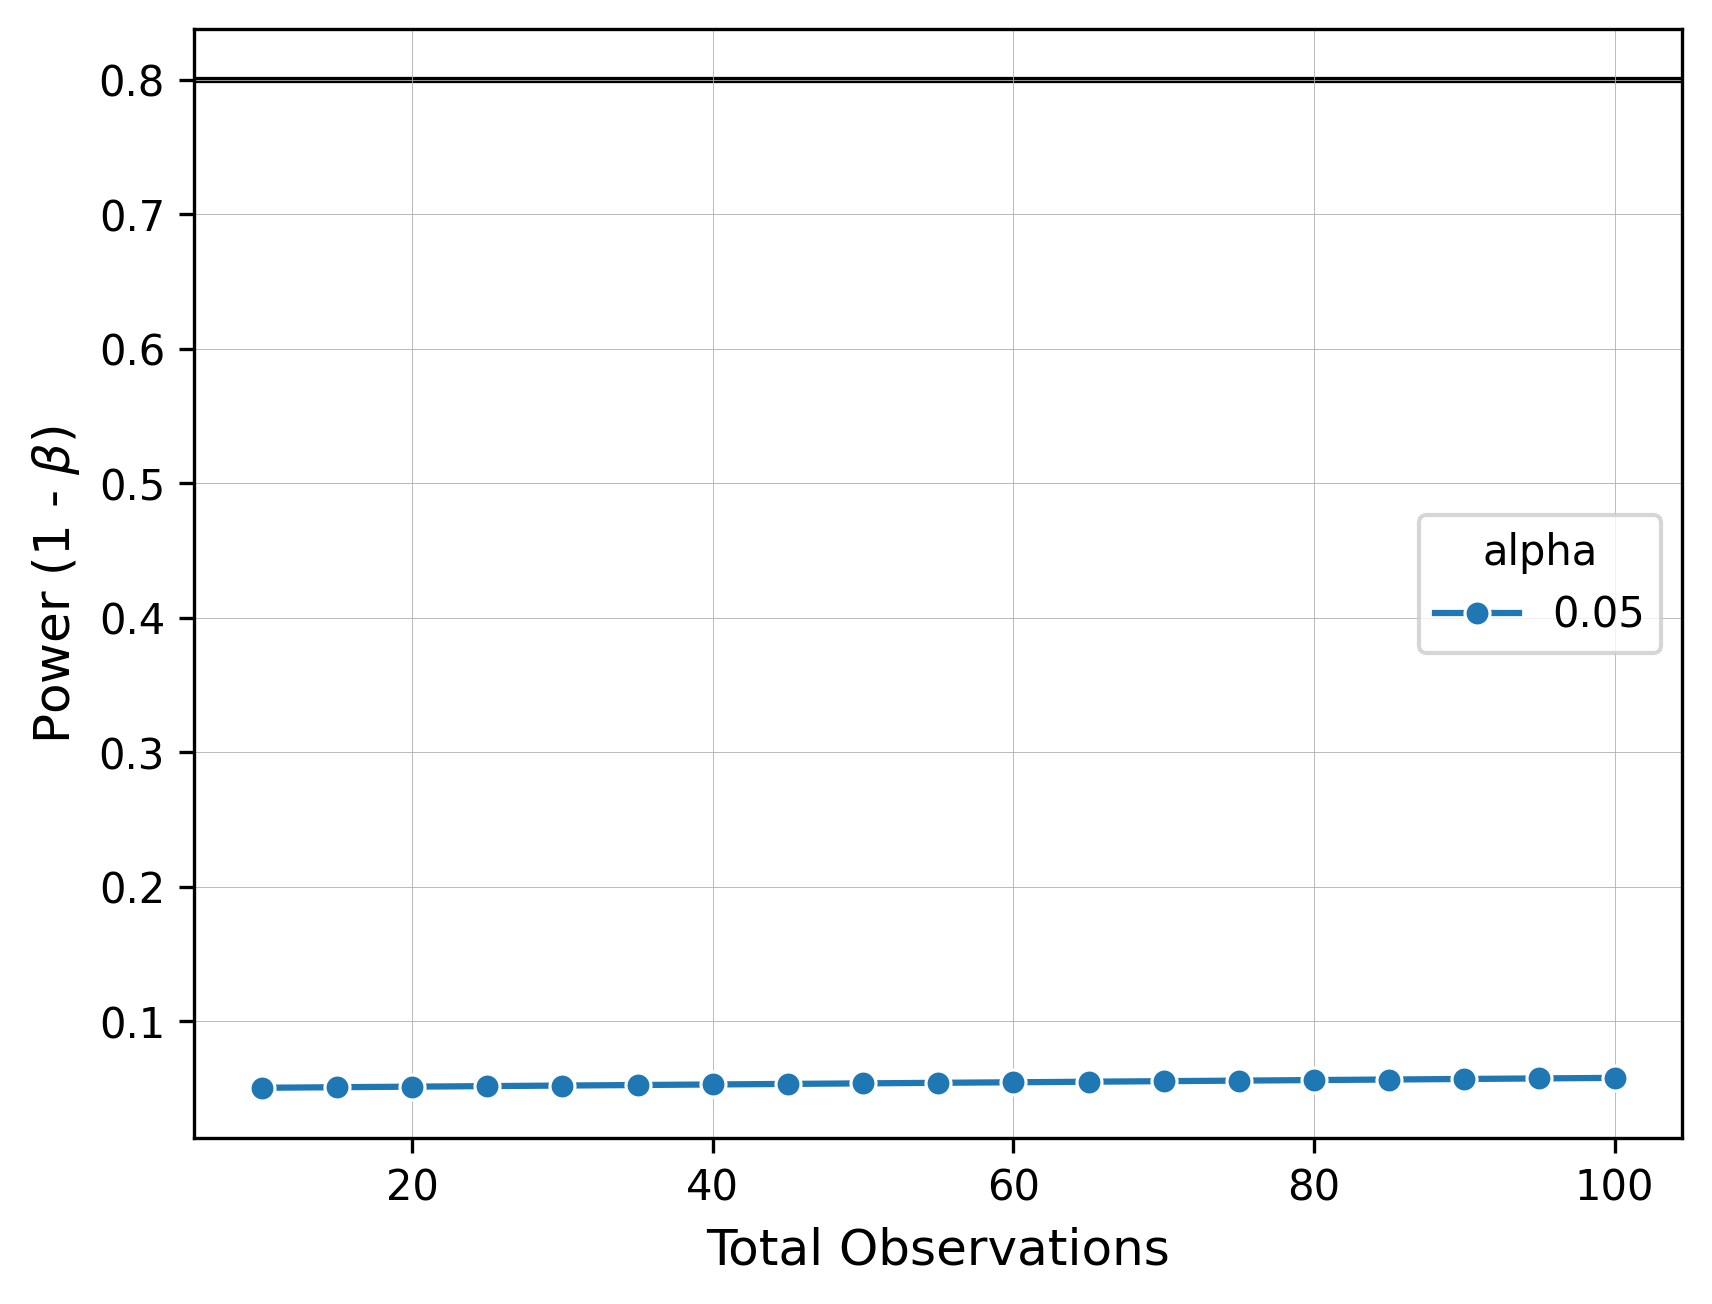

In [23]:

from evident.plotting import plot_power_curve
import numpy as np
import matplotlib.pyplot as plt

# Задание размеров фигуры
plt.figure(figsize=(3.5, 3.5))

# Ваши значения и результаты анализа
PS_alpha_vals = [0.05]
PS_obs_vals = np.arange(10, 101, step=5)
PS_P_results_p1 = tax_ps_p2.power_analysis("Diagnosis", alpha=PS_alpha_vals, total_observations=PS_obs_vals)

# Создание графика
plot_power_curve(PS_P_results_p1, target_power=0.8, style="alpha", markers=True)

# Сохранение графика в PDF с заданными размерами
plt.savefig('power_analysis_plot.pdf', format='pdf', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
# Показать график в Jupyter Notebook
plt.show()